In [ ]:
# CUSTOMER SEGMENTATION 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
data.head(10)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

dict_keys(['Male', 'Female'])
dict_values([88, 112])


<BarContainer object of 2 artists>

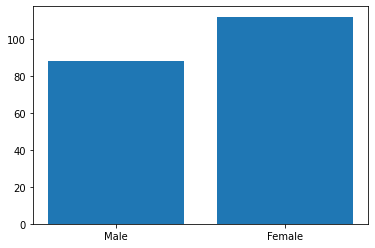

In [ ]:
from collections import Counter
genre_count=Counter(data.Genre)
print(genre_count.keys())
print(genre_count.values())
plt.bar(genre_count.keys(),genre_count.values())


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
from collections import Counter
X=data.iloc[:,[3,4]].values
X0=data.iloc[:,[2,4]].values
X1=data.iloc[:,[1,4]].values




In [ ]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [ ]:
from sklearn.cluster import KMeans 
wcss= []
for i in range(1,11) : 
  kmeans=KMeans(n_clusters=i,init ='k-means++',random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)


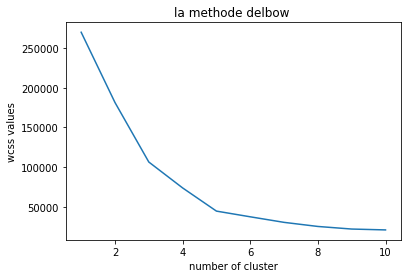

In [ ]:
plt.plot(range(1,11),wcss)
plt.title('la methode delbow ')
plt.xlabel('number of cluster')
plt.ylabel('wcss values')
plt.show()

In [ ]:
kMeans_Model=KMeans(n_clusters=5,init='k-means++',random_state=0)

training time :
0.041748762130737305
Silouhette coefficient : 
0.553931997444648


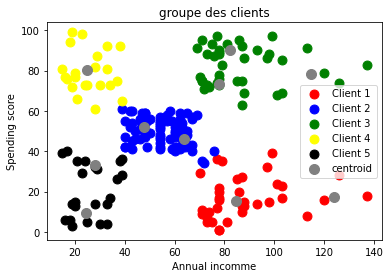

In [ ]:
import time                                                                     
from sklearn import metrics                                                     
start=time.time()                                                               
y_kmeans = kMeans_Model.fit_predict(X)
end=time.time()
print('training time :')
print(end-start)
print('Silouhette coefficient : ')
print(metrics.silhouette_score(X,kMeans_Model.labels_,metric='euclidean'))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=80,c='red',label='Client 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=80,c='blue',label='Client 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=80,c='green',label='Client 3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=80,c='yellow',label='Client 4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=80,c='black',label='Client 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='gray',label='centroid')
plt.title('groupe des clients')
plt.xlabel('Annual incomme')
plt.ylabel('Spending score')
plt.legend()


training time : 
0.015536785125732422
Silouhette coefficient : 
0.553931997444648


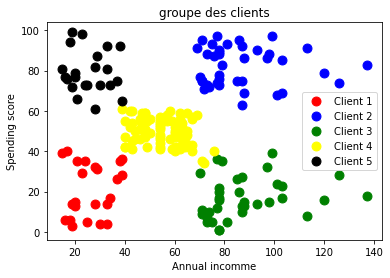

In [ ]:
import time
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics
mbk=MiniBatchKMeans(
    init='k-means++',
    n_clusters=5,
    n_init=5,
)
start=time.time()
m=mbk.fit_predict(X)
end=time.time()
print('training time : ' )
print(end-start)
print('Silouhette coefficient : ')
print(metrics.silhouette_score(X,mbk.labels_,metric='euclidean'))
# plot 
plt.scatter(X[m==0,0],X[m==0,1],s=80,c='red',label='Client 1')
plt.scatter(X[m==1,0],X[m==1,1],s=80,c='blue',label='Client 2')
plt.scatter(X[m==2,0],X[m==2,1],s=80,c='green',label='Client 3')
plt.scatter(X[m==3,0],X[m==3,1],s=80,c='yellow',label='Client 4')
plt.scatter(X[m==4,0],X[m==4,1],s=80,c='black',label='Client 5')
plt.title('groupe des clients')
plt.xlabel('Annual incomme')
plt.ylabel('Spending score')
plt.legend()
 

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from collections import Counter
start=time.time()
Xx=StandardScaler().fit_transform(X)
model=DBSCAN(eps=0.3,min_samples=10).fit(Xx)
end=time.time()
core_sample_mask=np.zeros_like(model.labels_,dtype=bool)
core_sample_mask[model.core_sample_indices_]=True
labels=model.labels_
n_clusters=len(set(labels)) - (1 if -1 in labels else 0)
n_noise=list(labels).count(-1)
n_noise
print('nombre des clusters ',n_clusters)
print('temps d\'apprentissage ',end-start)
print('Silhouette coefficient',metrics.silhouette_score(Xx,labels))


nombre des clusters  4
temps d'apprentissage  0.004462718963623047
Silhouette coefficient 0.14088508702832656


No handles with labels found to put in legend.


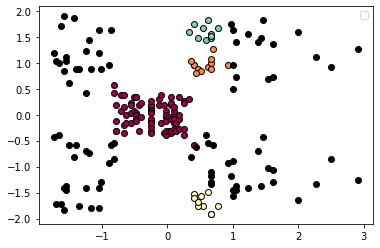

In [ ]:
# plot the scatter of DBSCAN
unique_labels=set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
      # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = Xx[class_member_mask & core_sample_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

    xy = Xx[class_member_mask & ~core_sample_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )
plt.legend()
plt.show()

In [ ]:
from sklearn.cluster import KMeans 
wcss1= []
for i in range(1,11) : 
  kmeanss=KMeans(n_clusters=i,init ='k-means++',random_state = 0)
  kmeanss.fit(X0)
  wcss1.append(kmeanss.inertia_)


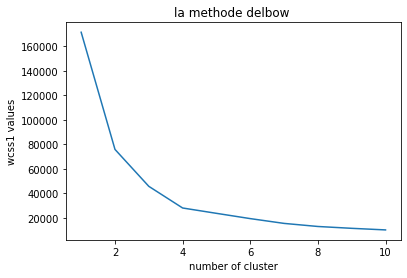

In [ ]:
plt.plot(range(1,11),wcss1)
plt.title('la methode delbow ')
plt.xlabel('number of cluster')
plt.ylabel('wcss1 values')
plt.show()

In [ ]:
kMeans_Model1=KMeans(n_clusters=4,init='k-means++',random_state=0)

training time : 0.06380772590637207
Silouhette coefficient :  0.49973941540141753


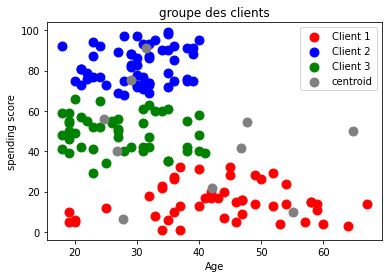

In [ ]:
import time 
from sklearn import metrics
start=time.time()
y_kmeanss = kMeans_Model1.fit_predict(X0)
end=time.time()
print('training time :',end-start)
print('Silouhette coefficient : ',metrics.silhouette_score(X0,kMeans_Model1.labels_,metric='euclidean'))
plt.scatter(X0[y_kmeanss==0,0],X0[y_kmeanss==0,1],s=80,c='red',label='Client 1')
plt.scatter(X0[y_kmeanss==1,0],X0[y_kmeanss==1,1],s=80,c='blue',label='Client 2')
plt.scatter(X0[y_kmeanss==2,0],X0[y_kmeanss==2,1],s=80,c='green',label='Client 3')
plt.scatter(kmeanss.cluster_centers_[:,0],kmeanss.cluster_centers_[:,1],s=80,c='gray',label='centroid')
plt.title('groupe des clients')
plt.xlabel('Age')
plt.ylabel('spending score')
plt.legend()

In [ ]:
total_client_per_Age1=data[data['Spending Score (1-100)']<=40]
total_client_per_Age2=data[data['Spending Score (1-100)']<=60]
total_client_per_Age3=data[data['Spending Score (1-100)']<=100]
print(len(total_client_per_Age1))
print(len(total_client_per_Age2)-len(total_client_per_Age1))
print(len(total_client_per_Age3)-len(total_client_per_Age2))
total_per_age=data[data['Age']<20]
total_per_age1=data[data['Age']<40]
total_per_age2=data[data['Age']<70]
print(len(total_per_age))
print(len(total_per_age1)-len(total_per_age))
print(len(total_per_age2)-len(total_per_age1))

63
75
62
12
104
82


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from collections import Counter
start=time.time()
Xx0=StandardScaler().fit_transform(X0)
model0=DBSCAN(eps=0.3,min_samples=10).fit(Xx0)
end=time.time()
core_sample_mask=np.zeros_like(model0.labels_,dtype=bool)
core_sample_mask[model.core_sample_indices_]=True
labels0=model.labels_
n_clusters=len(set(labels0)) - (1 if -1 in labels0 else 0)
n_noise0=list(labels0).count(-1)
n_noise0
print('nombre des clusters ',n_clusters)
print('temps d\'apprentissage ',end-start)
print('Silhouette coefficient',metrics.silhouette_score(Xx0,labels0))


nombre des clusters  4
temps d'apprentissage  0.004353046417236328
Silhouette coefficient -0.10586443872229069


No handles with labels found to put in legend.


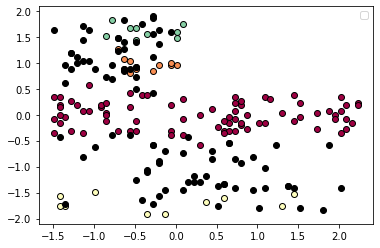

In [ ]:
unique_labels=set(labels0)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
      # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = Xx0[class_member_mask & core_sample_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

    xy = Xx0[class_member_mask & ~core_sample_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )
plt.legend()
plt.show()

training time : 
0.011694908142089844
Silouhette coefficient : 
0.014703726921325906


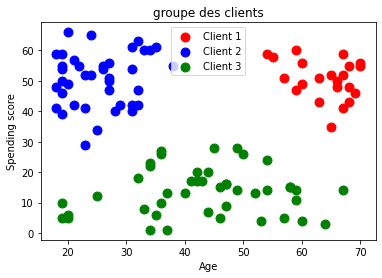

In [ ]:
import time
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics
mbk0=MiniBatchKMeans(
    init='k-means++',
    n_clusters=3,
    n_init=3,
)
start=time.time()
m=mbk.fit_predict(X0)
end=time.time()
print('training time : ' )
print(end-start)
print('Silouhette coefficient : ')
print(metrics.silhouette_score(X,mbk.labels_,metric='euclidean'))
# plot 
plt.scatter(X0[m==0,0],X0[m==0,1],s=80,c='red',label='Client 1')
plt.scatter(X0[m==1,0],X0[m==1,1],s=80,c='blue',label='Client 2')
plt.scatter(X0[m==2,0],X0[m==2,1],s=80,c='green',label='Client 3')

plt.title('groupe des clients')
plt.xlabel('Age')
plt.ylabel('Spending score')
plt.legend()

In [ ]:
kMeans_Model2=KMeans(n_clusters=2,init='k-means++',random_state=0)